# **Requesting Apple data from API (2019 - present)**

In [80]:
import requests
import pandas as pd
import json

api_key = 'IJTCTE92X6KPDYVD'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey={api_key}&datatype=json'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    time_series = data['Time Series (Daily)']
    stock_data = []

    for date, stock_info in time_series.items():
        # Filter stock data from 2010 to 2018
        if date >= '2018-12-31':
            stock_data.append([date,
                               stock_info['1. open'],
                               stock_info['2. high'],
                               stock_info['3. low'],
                               stock_info['4. close'],
                               stock_info['6. volume'],
                               stock_info['5. adjusted close']])
else:
    print("Request failed")

# Create DataFrame from the stock data
stock_data_df = pd.DataFrame(stock_data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close'])

# Save DataFrame to a CSV file
stock_data_df.to_csv('AAPL_19andForword.csv', index=False)

# Print the DataFrame
print(stock_data_df)

            Date    Open    High       Low   Close    Volume    Adjusted Close
0     2023-05-03   169.5  170.92    167.16  167.45  65136018            167.45
1     2023-05-02  170.09  170.35    167.54  168.54  48425696            168.54
2     2023-05-01  169.28  170.45    168.64  169.59  52472936            169.59
3     2023-04-28  168.49  169.85  167.8801  169.68  55275851            169.68
4     2023-04-27  165.19  168.56    165.19  168.41  64902329            168.41
...          ...     ...     ...       ...     ...       ...               ...
1088  2019-01-07   148.7  148.83     145.9  147.93  54777764  35.6382645676655
1089  2019-01-04  144.53  148.55     143.8  148.26  58607070  35.7177658676542
1090  2019-01-03  143.98  145.72     142.0  142.19  91312195  34.2554237739226
1091  2019-01-02  154.89  158.85    154.23  157.92  37039737   38.044985740051
1092  2018-12-31  158.53  159.36    156.48  157.74  35003466  38.0016213946026

[1093 rows x 7 columns]


In [81]:
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1093 non-null   object
 1   Open            1093 non-null   object
 2   High            1093 non-null   object
 3   Low             1093 non-null   object
 4   Close           1093 non-null   object
 5   Volume          1093 non-null   object
 6   Adjusted Close  1093 non-null   object
dtypes: object(7)
memory usage: 59.9+ KB


# **Exploratory Data Analysis**

**Background:** Starting from 08/31/2020, Apple decided to split on a 4-for-1 basis, we would try to multiple the stock after the split date by 4 in order to have a good sense while doing time analysis.

In [82]:
# Rotate the time horizon.
stock_data_df = stock_data_df.iloc[::-1].reset_index(drop=True)

In [83]:
# Set Date as datetime type and all the others to float type for better manipulation

stock_data_df['Date'] = pd.to_datetime(stock_data_df['Date'])

cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close']
for col in cols_to_convert:
    stock_data_df[col] = stock_data_df[col].astype(float)

stock_data_df.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close
0,2018-12-31,158.53,159.36,156.48,157.74,35003466.0,38.001621
1,2019-01-02,154.89,158.85,154.23,157.92,37039737.0,38.044986
2,2019-01-03,143.98,145.72,142.00,142.19,91312195.0,34.255424
3,2019-01-04,144.53,148.55,143.80,148.26,58607070.0,35.717766
4,2019-01-07,148.70,148.83,145.90,147.93,54777764.0,35.638265


In [84]:
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1093 non-null   datetime64[ns]
 1   Open            1093 non-null   float64       
 2   High            1093 non-null   float64       
 3   Low             1093 non-null   float64       
 4   Close           1093 non-null   float64       
 5   Volume          1093 non-null   float64       
 6   Adjusted Close  1093 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 59.9 KB


In [108]:
# Set the datetime column as the index
stock_data_df.set_index('Date', inplace=True)

# Multiply the value of the rows with datetime greater than '2020-08-30' by 4
stock_data_df.loc[stock_data_df.index > '2020-08-30', ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close']] *= 4

stock_data_df.head()

KeyError: ignored

In [86]:
stock_data_df.describe()

,Open,High,Low,Close,Volume,Adjusted Close
count,1093.000000,1093.000000,1093.000000,1093.000000,1.093000e+03,1093.000000
mean,455.015663,460.639716,449.802142,455.498225,2.388220e+08,378.242491
std,172.472022,174.556564,170.375813,172.533655,1.965322e+08,255.545921
min,143.980000,145.720000,142.000000,142.190000,1.136204e+07,34.255424
25%,277.950000,281.770000,276.860000,279.440000,3.431255e+07,68.335389
50%,509.640000,514.622800,503.760000,508.400000,2.581912e+08,503.325846
75%,595.440000,601.280000,589.800000,595.880000,3.595237e+08,592.218006
max,730.520000,731.760000,716.480000,728.040000,1.330429e+09,722.737934


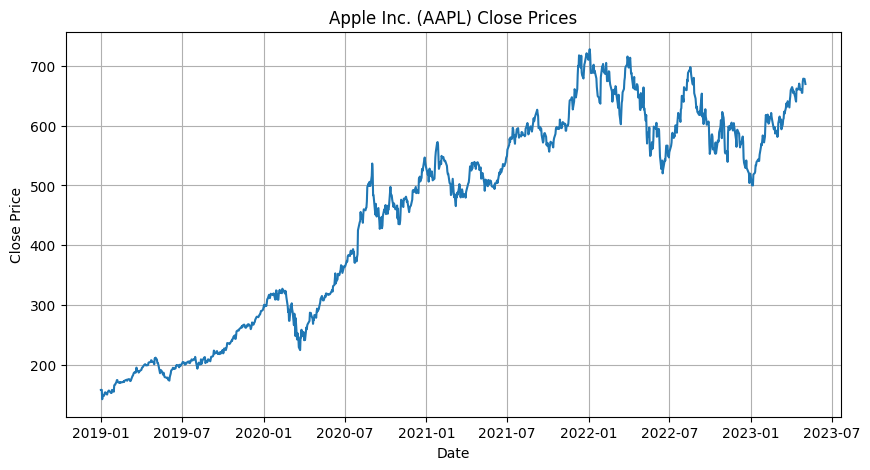

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(stock_data_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Apple Inc. (AAPL) Close Prices')
plt.grid()
plt.show()

In [88]:
pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Probably need more explantion to non-finance people about the terms here:**

In [89]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import yfinance as yf

# Getting CBOE Volatility Index from 2019

vix_symbol = '^VIX'

vix_data = yf.download(vix_symbol, start='2019-01-01')

vix_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,27.540001,28.530001,23.049999,23.219999,23.219999,0
2019-01-03,25.680000,26.600000,24.049999,25.450001,25.450001,0
2019-01-04,24.360001,24.480000,21.190001,21.379999,21.379999,0
2019-01-07,22.059999,22.709999,20.910000,21.400000,21.400000,0
2019-01-08,20.959999,22.030001,20.090000,20.469999,20.469999,0
...,...,...,...,...,...,...
2023-04-27,18.430000,18.430000,16.719999,17.030001,17.030001,0
2023-04-28,17.209999,17.650000,15.720000,15.780000,15.780000,0
2023-05-01,16.410000,16.620001,15.530000,16.080000,16.080000,0


In [91]:
vix_data = vix_data.add_prefix("vix_")
vix_data.reset_index(inplace=True)
vix_data['Date'] = pd.to_datetime(vix_data['Date'])
vix_data.head()

,Date,vix_Open,vix_High,vix_Low,vix_Close,vix_Adj Close,vix_Volume
0,2019-01-02,27.540001,28.530001,23.049999,23.219999,23.219999,0
1,2019-01-03,25.680000,26.600000,24.049999,25.450001,25.450001,0
2,2019-01-04,24.360001,24.480000,21.190001,21.379999,21.379999,0
3,2019-01-07,22.059999,22.709999,20.910000,21.400000,21.400000,0
4,2019-01-08,20.959999,22.030001,20.090000,20.469999,20.469999,0


In [92]:
max_date = vix_data['Date'].max()
max_date

Timestamp('2023-05-03 00:00:00')

**Import NASDAQ Composite data**

Apple's stock price is related to the Nasdaq Composite index. The Nasdaq Composite is a stock market index that includes the common stocks and similar securities listed on the Nasdaq stock market, which is a major stock exchange in the United States. As Apple is a publicly traded company listed on the Nasdaq stock market, its stock price is a component of the Nasdaq Composite. 

In [93]:
#import the NASDAQ Composite data
import yfinance as yf

# Set the ticker symbol for NASDAQ Composite
tickerSymbol = '^IXIC'
ticker = yf.Ticker("AAPL")

# Use the history() method to get the historical data
history = ticker.history(period="max")

# Get the latest date by getting the last index of the DataFrame
latest_date = history.index[-1]

print("Latest date of available data:", latest_date)

# Set the start date
start_date = '2019-01-01'

# Get the data
nasdaq_data = yf.download(tickerSymbol, start=start_date)
nasdaq_data

Latest date of available data: 2023-05-03 00:00:00-04:00
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000
2019-01-03,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2631550000
2019-01-04,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2596150000
2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2523450000
2019-01-08,6893.439941,6909.580078,6795.859863,6897.000000,6897.000000,2407340000
...,...,...,...,...,...,...
2023-04-27,11972.150391,12154.009766,11950.919922,12142.240234,12142.240234,5253710000
2023-04-28,12117.540039,12227.719727,12082.570312,12226.580078,12226.580078,5331380000
2023-05-01,12210.049805,12261.320312,12181.080078,12212.599609,12212.599609,5168430000


In [94]:
nasdaq_data = nasdaq_data.add_prefix("nasdaq_")
nasdaq_data.reset_index(inplace=True)
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'])
nasdaq_data.head()

,Date,nasdaq_Open,nasdaq_High,nasdaq_Low,nasdaq_Close,nasdaq_Adj Close,nasdaq_Volume
0,2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000
1,2019-01-03,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2631550000
2,2019-01-04,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2596150000
3,2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2523450000
4,2019-01-08,6893.439941,6909.580078,6795.859863,6897.000000,6897.000000,2407340000


In [95]:
# Merge vix data
df = pd.merge(stock_data_df, vix_data,on = 'Date', how='left')
df.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,vix_Close,vix_Adj Close,vix_Volume
0,2018-12-31,158.53,159.36,156.48,157.74,35003466.0,38.001621,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,154.89,158.85,154.23,157.92,37039737.0,38.044986,27.540001,28.530001,23.049999,23.219999,23.219999,0.0
2,2019-01-03,143.98,145.72,142.00,142.19,91312195.0,34.255424,25.680000,26.600000,24.049999,25.450001,25.450001,0.0
3,2019-01-04,144.53,148.55,143.80,148.26,58607070.0,35.717766,24.360001,24.480000,21.190001,21.379999,21.379999,0.0
4,2019-01-07,148.70,148.83,145.90,147.93,54777764.0,35.638265,22.059999,22.709999,20.910000,21.400000,21.400000,0.0


In [96]:
# Merge nasdaq data
df = pd.merge(df, nasdaq_data,on = 'Date', how='left')
df.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,vix_Close,vix_Adj Close,vix_Volume,nasdaq_Open,nasdaq_High,nasdaq_Low,nasdaq_Close,nasdaq_Adj Close,nasdaq_Volume
0,2018-12-31,158.53,159.36,156.48,157.74,35003466.0,38.001621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,154.89,158.85,154.23,157.92,37039737.0,38.044986,27.540001,28.530001,23.049999,23.219999,23.219999,0.0,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2.261800e+09
2,2019-01-03,143.98,145.72,142.00,142.19,91312195.0,34.255424,25.680000,26.600000,24.049999,25.450001,25.450001,0.0,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2.631550e+09
3,2019-01-04,144.53,148.55,143.80,148.26,58607070.0,35.717766,24.360001,24.480000,21.190001,21.379999,21.379999,0.0,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2.596150e+09
4,2019-01-07,148.70,148.83,145.90,147.93,54777764.0,35.638265,22.059999,22.709999,20.910000,21.400000,21.400000,0.0,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2.523450e+09


In [97]:
'''# Shift the 'Close' price forward by 30 and 60 rows
df['Price_30_days'] = df['Close'].shift(-30)
df['Price_60_days'] = df['Close'].shift(-60)

# Calculate the price change after 30 and 60 days
df['Close_Price_Change_30'] = df['Price_30_days'] - df['Close']
df['Close_Price_Change_60'] = df['Price_60_days'] - df['Close']

# Create new columns indicating whether the price increased or decreased after 30 and 60 days
# Increased: 1, Decreased: 0
df['Price_30_days_Status'] = 1
df['Price_60_days_Status'] = 1

df.loc[df['Close_Price_Change_30'] < 0, 'Price_30_days_Status'] = 0
df.loc[df['Close_Price_Change_60'] < 0, 'Price_60_days_Status'] = 0

# Drop the unnecessary columns
df = df.drop(columns=['Price_30_days', 'Price_60_days', 'Close_Price_Change_30', 'Close_Price_Change_60'])

df'''


"# Shift the 'Close' price forward by 30 and 60 rows\ndf['Price_30_days'] = df['Close'].shift(-30)\ndf['Price_60_days'] = df['Close'].shift(-60)\n\n# Calculate the price change after 30 and 60 days\ndf['Close_Price_Change_30'] = df['Price_30_days'] - df['Close']\ndf['Close_Price_Change_60'] = df['Price_60_days'] - df['Close']\n\n# Create new columns indicating whether the price increased or decreased after 30 and 60 days\n# Increased: 1, Decreased: 0\ndf['Price_30_days_Status'] = 1\ndf['Price_60_days_Status'] = 1\n\ndf.loc[df['Close_Price_Change_30'] < 0, 'Price_30_days_Status'] = 0\ndf.loc[df['Close_Price_Change_60'] < 0, 'Price_60_days_Status'] = 0\n\n# Drop the unnecessary columns\ndf = df.drop(columns=['Price_30_days', 'Price_60_days', 'Close_Price_Change_30', 'Close_Price_Change_60'])\n\ndf"

# **Data Smoothing Process**


In [98]:
# define the number of days out you want to predict
days_out = 7

cp_df=df.copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
sm_df = cp_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close',
       'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_Adj Close',
       'vix_Volume', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low',
       'nasdaq_Close', 'nasdaq_Adj Close', 'nasdaq_Volume']].transform(lambda x: x.ewm(span = days_out).mean())

In [99]:
# Join the smoothed columns with the symbol and datetime column from the old data frame.
sm_df = pd.concat([df[['Date']], sm_df], axis=1, sort=False)

# define the number of days out you want to predict
days_out = 7

# create a new column that will house the flag, and for each group calculate the diff compared to days_out days ago. Then use Numpy to define the sign.
# sm_df['Signal_Flag'] = df['Close'].transform(lambda x: np.sign(x.diff(days_out)))

# print the first 50 rows
sm_df.tail()

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,vix_Close,vix_Adj Close,vix_Volume,nasdaq_Open,nasdaq_High,nasdaq_Low,nasdaq_Close,nasdaq_Adj Close,nasdaq_Volume
1088,2023-04-27,658.706846,666.637110,656.409153,662.547814,2.092716e+08,662.547814,18.088757,18.718753,17.069345,17.650602,17.650602,0.0,12001.312915,12090.274165,11929.436962,12014.592083,12014.592083,5.003634e+09
1089,2023-04-28,662.520134,669.827832,660.186965,666.590861,2.122296e+08,666.590861,17.869068,18.451565,16.732009,17.182951,17.182951,0.0,12030.369696,12124.635556,11967.720300,12067.589081,12067.589081,5.085570e+09
1090,2023-05-01,666.170101,672.820874,663.780224,669.533146,2.116451e+08,669.533146,17.504301,17.993674,16.431506,16.907213,16.907213,0.0,12075.289723,12158.806745,12021.060244,12103.841713,12103.841713,5.106285e+09
1091,2023-05-02,669.717576,674.965656,665.375168,670.689859,2.071595e+08,670.689859,17.195726,18.447755,16.388630,17.125410,17.125410,0.0,12105.972175,12170.750078,12019.602800,12098.008726,12098.008726,5.205066e+09
1092,2023-05-03,671.788182,677.144242,666.191376,670.467394,2.205057e+08,670.467394,17.351794,18.543316,16.588972,17.429058,17.429058,0.0,12103.739141,12181.200010,12020.317090,12079.839064,12079.839064,5.349340e+09


**We adopted the following metrics from Khaidem,2016 paper as our features:**

*RSI*: RSI is a popular momentum indicator which determines whether the stock is overbought or oversold.

*Stochastic Oscillator*: Stochastic Oscillator follows the speed or the momentum of the price. 

*Williams %R*: Williams %R ranges from -100 to 0. When its value is above -20, it indicates a sell signal and when its value is below -80, it indicates a buy signal.

*Moving Average Convergence Divergence (MACD)*: 

MACD = EMA12(C) −EMA26(C)
SignalLine = EMA9(MACD)

stands for Exponential Moving Average. When the MACD goes below the SingalLine, it indicates a sell signal. When it goes above the SignalLine, it indicates a buy signal.

*On Balance Volumn*: This technical indicator is used to find buying and selling trends of a stock.

*Price Rate of Change*: It measures the most recent change in price with respect to the price in n days ago.



In [100]:
# Calculate indicators
import yfinance as yf
import pandas_ta as pta

df = sm_df.copy()

# Calculate RSI
df['RSI'] = pta.rsi(df['Close'], length=14)

# Calculate MACD
macd = pta.macd(df['Close'], fast=12, slow=26, signal=9)
df['MACD'] = macd.iloc[:, 0]
df['MACD Signal'] = macd.iloc[:, 1]
df['MACD Hist'] = macd.iloc[:, 2]

# Calculate Stochastic Oscillator
stoch = pta.stoch(df['High'], df['Low'], df['Close'])
df['%K'] = stoch.iloc[:, 0]
df['%D'] = stoch.iloc[:, 1]

# Calculate Rate of Change
df['ROC'] = pta.roc(df['Close'], length=10)

# Calculate On Balance Volume
df['OBV'] = pta.obv(df['Close'], df['Volume'])

# Calculate Williams %R
df['Williams %R'] = pta.willr(df['High'], df['Low'], df['Close'], length=14)

# Delete all rows that contain nan values
df = df.dropna()

df.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,...,nasdaq_Volume,RSI,MACD,MACD Signal,MACD Hist,%K,%D,ROC,OBV,Williams %R
33,2019-02-19,170.140578,171.408053,169.237938,170.371561,2.336423e+07,41.197276,16.013184,16.620383,15.082503,...,2.160418e+09,88.641823,5.404339,-0.089893,5.494232,93.493794,93.251220,3.935019,5.628781e+08,-6.310114
34,2019-02-20,170.402945,171.886060,169.675972,170.786188,2.405179e+07,41.303413,15.739873,16.262767,14.809362,...,2.170981e+09,89.119484,5.274997,-0.175388,5.450385,93.145646,93.224109,2.581771,5.869299e+08,-7.582626
35,2019-02-21,170.752219,172.007049,169.831984,170.854643,2.235121e+07,41.324340,15.304886,15.989563,14.569511,...,2.164406e+09,89.200237,5.119008,-0.265101,5.384110,92.292561,92.977334,1.441372,6.092811e+08,-9.229576
36,2019-02-22,170.959170,172.255293,170.218997,171.383495,2.149167e+07,41.455567,15.093658,15.609661,14.304625,...,2.230446e+09,89.828316,4.980646,-0.322771,5.303417,91.703346,92.380518,1.377057,6.307728e+08,-8.077761
37,2019-02-25,171.759391,173.158986,171.151765,172.095134,2.158710e+07,41.630200,14.797736,15.432241,14.088463,...,2.272688e+09,90.618928,4.872252,-0.344932,5.217184,90.278572,91.424826,1.594445,6.523599e+08,-11.856949


In [101]:
copy1 = df.copy()
copy2 = df.copy()
copy3 = df.copy()

In [102]:
# shift the 'Close' price forward by 7 rows
copy1['Price_7_days'] = copy1['Close'].shift(-7)

# calculate the price change after 7 days
copy1['Close_Price_Change'] = copy1['Price_7_days'] - copy1['Close']

# create a new column indicating whether the price increased or decreased after 7 days
# Increased: 1, Decreased: 0
copy1['Price_7_days_Status'] = 1 
copy1.loc[copy1['Close_Price_Change'] < 0, 'Price_7_days_Status'] = 0

copy1.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close,vix_Open,vix_High,vix_Low,...,MACD Signal,MACD Hist,%K,%D,ROC,OBV,Williams %R,Price_7_days,Close_Price_Change,Price_7_days_Status
33,2019-02-19,170.140578,171.408053,169.237938,170.371561,2.336423e+07,41.197276,16.013184,16.620383,15.082503,...,-0.089893,5.494232,93.493794,93.251220,3.935019,5.628781e+08,-6.310114,173.193424,2.821863,1
34,2019-02-20,170.402945,171.886060,169.675972,170.786188,2.405179e+07,41.303413,15.739873,16.262767,14.809362,...,-0.175388,5.450385,93.145646,93.224109,2.581771,5.869299e+08,-7.582626,173.637571,2.851382,1
35,2019-02-21,170.752219,172.007049,169.831984,170.854643,2.235121e+07,41.324340,15.304886,15.989563,14.569511,...,-0.265101,5.384110,92.292561,92.977334,1.441372,6.092811e+08,-9.229576,174.190680,3.336037,1
36,2019-02-22,170.959170,172.255293,170.218997,171.383495,2.149167e+07,41.455567,15.093658,15.609661,14.304625,...,-0.322771,5.303417,91.703346,92.380518,1.377057,6.307728e+08,-8.077761,174.525511,3.142016,1
37,2019-02-25,171.759391,173.158986,171.151765,172.095134,2.158710e+07,41.630200,14.797736,15.432241,14.088463,...,-0.344932,5.217184,90.278572,91.424826,1.594445,6.523599e+08,-11.856949,174.524134,2.428999,1


In [103]:
# # Shift the 'Close' price forward by 30 rows
copy2['Price_30_days'] = copy2['Close'].shift(-30)


# # Calculate the price change after 30 days
copy2['Close_Price_Change_30'] = copy2['Price_30_days'] - copy2['Close']


# # Create new columns indicating whether the price increased or decreased after 30 and 60 days
# # Increased: 1, Decreased: 0
copy2['Price_30_days_Status'] = 1

copy2.loc[copy2['Close_Price_Change_30'] < 0, 'Price_30_days_Status'] = 0


In [104]:
# # Shift the 'Close' price forward by 60 rows

copy3['Price_60_days'] = copy3['Close'].shift(-60)

# # Calculate the price change after 60 days

copy3['Close_Price_Change_60'] = copy3['Price_60_days'] - copy3['Close']

# # Create new columns indicating whether the price increased or decreased after 30 and 60 days
# # Increased: 1, Decreased: 0

copy3['Price_60_days_Status'] = 1


copy3.loc[copy3['Close_Price_Change_60'] < 0, 'Price_60_days_Status'] = 0


In [105]:
copy1.to_csv('2019_7days_.csv', index=False)

In [106]:
copy2.to_csv('2019_30days_.csv', index=False)

In [107]:
copy3.to_csv('2019_60days_.csv', index=False)

Reference: 

Khaidem, Luckyson & Saha, Snehanshu & Basak, Suryoday & Kar, Saibal & Dey, Sudeepa. (2016). Predicting the direction of stock market prices using random forest. 